<a href="https://colab.research.google.com/github/MoKaDaLi/Data-Science-for-Quran/blob/main/Data_Science_for_Quran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# ===========================================
# 📦 Installation & vérification des librairies
# ===========================================
import sys
import importlib
import subprocess

# Liste des packages requis avec versions minimales
packages = {
    "pandas": "2.0",
    "numpy": "1.25",
    "matplotlib": "3.8",
    "scikit-learn": "1.4",
    "networkx": "3.2",
    # Optionnels but useful
    "nltk": "3.9",
    "camel-tools": "1.5",
    "pyarabic": "0.6",
    # "jupyter": "1.0", # Removed explicit check for jupyter
    "ipykernel": "6.29"
}

# Function to install if module is missing
def install_if_missing(pkg, version):
    try:
        # Special case for scikit-learn
        if pkg == "scikit-learn":
            mod = importlib.import_module("sklearn")
        elif pkg == "pyarabic":
            importlib.import_module("pyarabic")
            print(f"✅ {pkg} already installed")
            return # Exit function after successful import/check
        else:
            mod = importlib.import_module(pkg.replace("-", "_"))
            print(f"✅ {pkg} already installed (version {mod.__version__})")
    except ModuleNotFoundError:
        print(f"⏳ Installing {pkg}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", f"{pkg}>={version}"])
        # After installation, import again to confirm
        if pkg == "scikit-learn":
             mod = importlib.import_module("sklearn")
        elif pkg == "pyarabic":
             importlib.import_module("pyarabic")
             print(f"✅ {pkg} installed")
             return # Exit function after successful import/check
        else:
            mod = importlib.import_module(pkg.replace("-", "_"))
            print(f"✅ {pkg} installed (version {mod.__version__})")

for pkg, ver in packages.items():
    install_if_missing(pkg, ver)

print("\n🎉 All necessary libraries are installed and ready!")

✅ pandas already installed (version 2.2.2)
✅ numpy already installed (version 2.0.2)
✅ matplotlib already installed (version 3.10.0)
✅ networkx already installed (version 3.5)
✅ nltk already installed (version 3.9.1)
✅ camel-tools already installed (version 1.5.7)
✅ pyarabic already installed
✅ ipykernel already installed (version 6.17.1)

🎉 All necessary libraries are installed and ready!


✅ pandas 2.2.2
✅ numpy 2.0.2
✅ matplotlib 3.10.0
✅ networkx 3.5
✅ scikit-learn 1.6.1


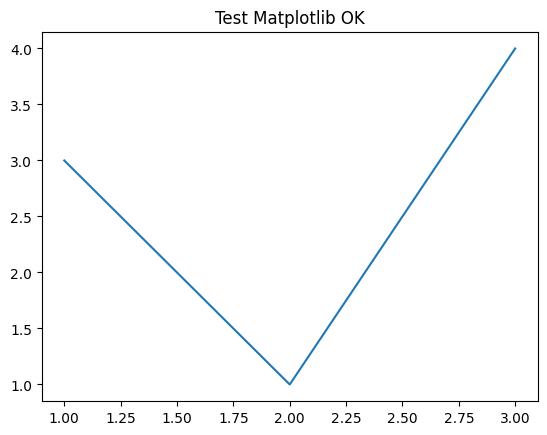

In [63]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import networkx as nx, sklearn
import matplotlib

print("✅ pandas", pd.__version__)
print("✅ numpy", np.__version__)
print("✅ matplotlib", matplotlib.__version__)
print("✅ networkx", nx.__version__)
print("✅ scikit-learn", sklearn.__version__)

# Mini test graphique
plt.plot([1,2,3],[3,1,4])
plt.title("Test Matplotlib OK")
plt.show()

In [64]:
from google.colab import files
import os

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Optional: Rename the uploaded file to match the one expected by the code
# if it has a different name
uploaded_filename = list(uploaded.keys())[0]
expected_filename = "MASAQ_dataset.json"

if uploaded_filename != expected_filename:
  os.rename(uploaded_filename, expected_filename)
  print(f"Renamed '{uploaded_filename}' to '{expected_filename}'")

KeyboardInterrupt: 

In [65]:
import pandas as pd

# Assuming df_raw was loaded in a previous cell (like crXu3Tnu3254)
# If not, you might need to reload it:
# try:
#     df_raw = pd.read_json("MASAQ_dataset.json", encoding="utf-8")
# except FileNotFoundError:
#     print("Error: MASAQ_dataset.json not found. Please upload the file.")
#     df_raw = None # Ensure df_raw is None if file not found

if df_raw is not None:
    # Check if 'Morph_Tag' column exists
    if "Morph_Tag" in df_raw.columns:
        print("Different tags in the JSON (from 'Morph_Tag' column):")
        display(df_raw["Morph_Tag"].unique())
    else:
        print("Error: 'Morph_Tag' column not found in the DataFrame.")

Different tags in the JSON (from 'Morph_Tag' column):


array(['PREP', 'NOUN_ABSTRACT', 'DET', 'NOUN_PROP', 'GERUND',
       'NOUN_CONCRETE', 'NSUFF_MASC_PL_GEN', 'NOUN_ACTIVE_PART',
       'CASE_DEF_ACC', 'PRON', 'IMPERF_PREF', 'IV', 'CONJ', 'CV',
       'OBJ_PRON', 'REL_PRON', 'PV', 'SUBJ_PRON', 'PRON_3MP',
       'CASE_DEF_GEN', 'NOUN_PASSIVE_PART', 'NEG_PART', 'OTHER',
       'DEM_PRON', 'PRON_3MS', 'IV3MP', 'IVSUFF_SUBJ:MP_MOOD:I',
       'NSUFF_FEM_SG', 'PV_PASS', None, 'POSS_PRON', 'DEM_PRON_MP',
       'NSUFF_MASC_PL_NOM', 'ANNUL_PART', 'INTERROG', 'JUSSIVE_PART',
       'POSS_PRON_3MP', 'ADJ_QUALIT', 'ADJ_COMP', 'PVSUFF_SUBJ:3MP',
       'EXCEPT_PART', 'CASE_INDEF_GEN', 'CASE_INDEF_ACC', 'NOON_V5',
       'ADV', 'KAAFA_MAKFOUFA', 'PART', 'INF_ANNUL_PART', 'PRON_2MP',
       'PVSUFF_SUBJ:3FS', 'NSUFF_MASC_PL_ACC', 'CASE_INDEF_(ACC_GEN)',
       'SUFF_FEM_TA', 'NSUFF_FEM_PL', 'IV3MS', 'CONDITION_PART',
       'PVSUFF_SUBJ:3MS', 'VOC_PART', 'None', 'CV_PREF',
       'PVSUFF_SUBJ:2MP', 'POSS_PRON_3MS', 'SUBJUNC_PART',
       'NSUFF_MAS

In [66]:
import pandas as pd

# Assuming df_raw was loaded in a previous cell (like crXu3Tnu3254)
# and the unique tags were obtained in cell BrVd4BsqyZkF

if df_raw is not None and "Morph_Tag" in df_raw.columns:
    all_tags = df_raw["Morph_Tag"].unique()

    # Filter tags containing "NOUN" (case-insensitive check)
    noun_tags = [tag for tag in all_tags if isinstance(tag, str) and "NOUN" in tag.upper()]

    print("Tags containing 'NOUN':")
    display(noun_tags)
else:
    print("Error: 'df_raw' not available or 'Morph_Tag' column not found.")

Tags containing 'NOUN':


['NOUN_ABSTRACT',
 'NOUN_PROP',
 'NOUN_CONCRETE',
 'NOUN_ACTIVE_PART',
 'NOUN_PASSIVE_PART',
 'NOUN_NUM',
 'NOUN_PROP_FOREIGN',
 'EXCEPT_NOUN',
 'NOUN_RELATIVE',
 'NOUN_FIVE',
 'NOUN_VERB_LIKE',
 'NOUN_TIME_PLACE',
 'NOUN_DIMINUTIVE',
 'NOUN',
 'NOUN_INSTRUMENT']

/tmp/ipython-input-1262961515.py:29: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


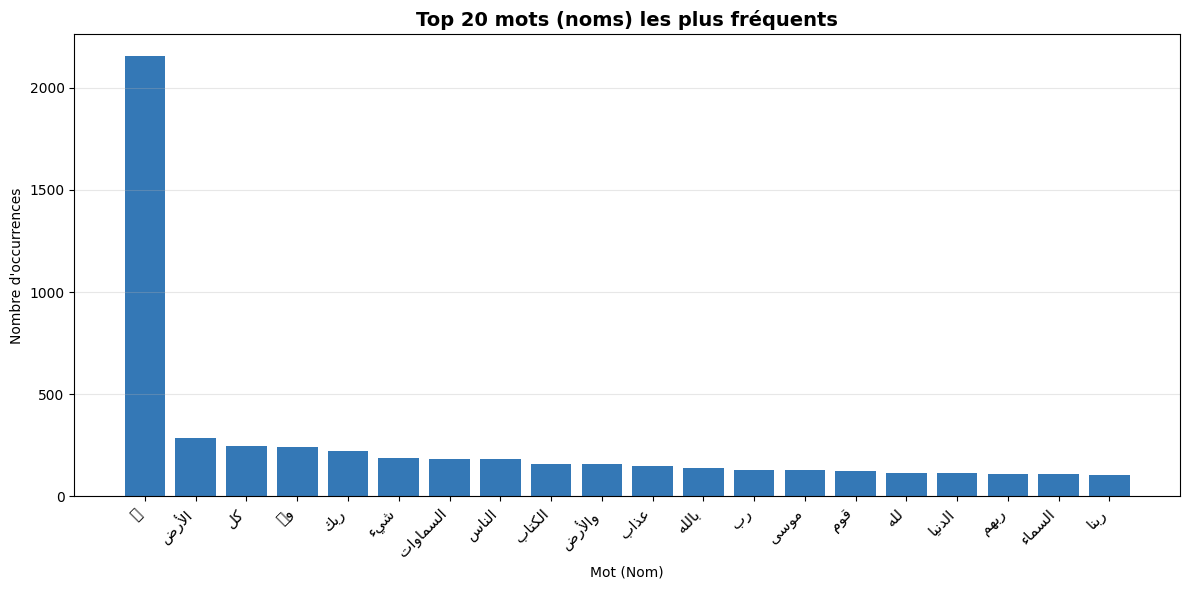

In [69]:
import matplotlib.pyplot as plt

# Assuming noun_word_freq was created in a previous cell (like 333a2c9c)
# and ARABIC_FONT is defined (from cell like X77ZO1KkZa0z or ui7FZfSRXyDw)

if 'noun_word_freq' in locals() and not noun_word_freq.empty:
    TOP_N = 20
    top_noun_words = noun_word_freq.head(TOP_N).copy()

    # Prepare Arabic text for display if needed (assuming ar_display function exists)
    if 'ar_display' in locals():
        # Use the correct column name 'Without_Diacritics' for the words
        top_noun_words["Word_ar"] = top_noun_words["Without_Diacritics"].map(ar_display)
        labels = top_noun_words["Word_ar"]
    else:
        # Use the correct column name 'Without_Diacritics' for the words
        labels = top_noun_words["Without_Diacritics"]
        print("Warning: ar_display function not found. Displaying Arabic text without reshaping.")


    plt.figure(figsize=(12, 6))
    plt.bar(labels, top_noun_words["Occurrences"], color="#3478b6")

    plt.xticks(rotation=45, ha="right", fontsize=11)
    plt.title(f"Top {TOP_N} mots (noms) les plus fréquents", fontsize=14, weight="bold")
    plt.xlabel("Mot (Nom)")
    plt.ylabel("Nombre d'occurrences")
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Error: 'noun_word_freq' DataFrame not available. Please run the previous cells to generate it.")

In [72]:
# Assuming df_nouns was created in a previous cell (like ac65519b)

if df_nouns is not None and not df_nouns.empty:
    print("Summary Statistics for df_nouns:")
    display(df_nouns.describe())

    print("\nDataFrame Info for df_nouns:")
    df_nouns.info()
else:
    print("Error: 'df_nouns' DataFrame is not available or is empty.")

Summary Statistics for df_nouns:


,ID,Segment_No,Sura_No,Verse_No,Word_No
count,23331.000000,23331.000000,23331.000000,23331.000000,23331.000000
mean,39520.707642,1.577729,25.341863,59.649694,10.639064
std,22619.464047,0.640061,22.473946,56.071350,9.497453
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19883.000000,1.000000,7.000000,18.000000,4.000000
50%,39770.000000,1.000000,19.000000,42.000000,8.000000
75%,59261.000000,2.000000,38.000000,84.000000,14.000000
max,77797.000000,5.000000,114.000000,286.000000,127.000000



DataFrame Info for df_nouns:
<class 'pandas.core.frame.DataFrame'>
Index: 23331 entries, 1 to 157675
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Case_Mood              23317 non-null  object
 1   Case_Mood_Marker       23309 non-null  object
 2   Gloss                  23331 non-null  object
 3   ID                     23331 non-null  int64 
 4   Invariable_Declinable  23324 non-null  object
 5   Morph_Tag              23331 non-null  object
 6   Morph_Type             23331 non-null  object
 7   Phrasal_Function       34 non-null     object
 8   Phrase                 33 non-null     object
 9   Possessive_Construct   23315 non-null  object
 10  Punctuation_Mark       2 non-null      object
 11  Segment_No             23331 non-null  int64 
 12  Segmented_Word         23331 non-null  object
 13  Sura_No                23331 non-null  int64 
 14  Syntactic_Role         23249 non-null  objec

In [73]:
import pandas as pd

# Assuming df_nouns was created in a previous cell (like ac65519b)

if df_nouns is not None and "Segmented_Word" in df_nouns.columns:
    # 1️⃣ Count the occurrences of each unique segmented word in df_nouns
    segmented_noun_freq = (
        df_nouns["Segmented_Word"]
        .value_counts()
        .reset_index()
        .rename(columns={"index": "Segmented_Word", "count": "Occurrences"})
    )

    # 2️⃣ Sort by frequency in descending order
    segmented_noun_freq = segmented_noun_freq.sort_values("Occurrences", ascending=False).reset_index(drop=True)

    # 3️⃣ Display the top 20 most frequent segmented noun words
    print("Top 20 most frequent segmented noun words:")
    display(segmented_noun_freq.head(20))

    # 4️⃣ (Optional) Export the segmented noun word frequencies
    segmented_noun_freq.to_csv("quran_segmented_noun_word_frequencies.csv", index=False, encoding="utf-8")
    print("\n✅ Fichier exporté : quran_segmented_noun_word_frequencies.csv")

else:
    print("Error: 'df_nouns' not available or 'Segmented_Word' column not found.")

Top 20 most frequent segmented noun words:


,Segmented_Word,Occurrences
0,له,2698
1,رب,964
2,أرض,461
3,قوم,383
4,آي,382
5,كل,376
6,كتاب,250
7,ناس,241
8,رسول,236
9,عذاب,231



✅ Fichier exporté : quran_segmented_noun_word_frequencies.csv


In [76]:
import pandas as pd

# Assuming df_raw was loaded in a previous cell (like crXu3Tnu3254)

if df_raw is not None and not df_raw.empty:
    # Filter the DataFrame to find rows where 'Without_Diacritics' is "الله"
    # Use .copy() to avoid SettingWithCopyWarning
    allah_occurrences = df_raw[df_raw["Without_Diacritics"] == "الله"].copy()

    # Remove duplicate IDs, keeping the first occurrence
    allah_occurrences_unique_id = allah_occurrences.drop_duplicates(subset=['ID']).copy()

    # Select the desired columns: ID, Sura_No, Verse_No
    allah_positions = allah_occurrences_unique_id[["ID", "Sura_No", "Verse_No"]]

    # Display the first few occurrences
    print("First 10 occurrences of 'الله' with their unique positions (ID, Sura_No, Verse_No):")
    display(allah_positions.head(10))

    # Display the total number of unique occurrences
    print(f"\nTotal number of unique occurrences of 'الله': {len(allah_positions)}")

    # Optional: Export the dataset of unique positions
    output_file = "allah_unique_occurrences_positions.csv"
    allah_positions.to_csv(output_file, index=False, encoding="utf-8")
    print(f"\n✅ Dataset of unique 'الله' occurrences saved to {output_file}")

else:
    print("Error: 'df_raw' DataFrame is not available or is empty. Please load the raw dataset.")

First 10 occurrences of 'الله' with their unique positions (ID, Sura_No, Verse_No):


,ID,Sura_No,Verse_No
2,2,1,1
152,78,2,7
201,101,2,9
229,114,2,10
341,175,2,15
397,203,2,17
487,250,2,20
498,255,2,20
606,311,2,23
710,363,2,26



Total number of unique occurrences of 'الله': 2153

✅ Dataset of unique 'الله' occurrences saved to allah_unique_occurrences_positions.csv


In [77]:
import pandas as pd

# Assuming allah_positions was created in a previous cell (like d4iOp01sDnik)

if 'allah_positions' in locals() and not allah_positions.empty:
    # Count the number of unique 'الله' occurrences per Sura
    allah_sura_distribution = (
        allah_positions["Sura_No"]
        .value_counts()
        .reset_index()
        .rename(columns={"index": "Sura_No", "count": "Unique_Occurrences"})
        .sort_values("Sura_No") # Sort by Sura number
        .reset_index(drop=True)
    )

    print("Distribution of unique 'الله' occurrences across Surahs:")
    display(allah_sura_distribution)

    # Optional: Export the distribution data
    output_file = "allah_unique_occurrences_sura_distribution.csv"
    allah_sura_distribution.to_csv(output_file, index=False, encoding="utf-8")
    print(f"\n✅ Distribution data saved to {output_file}")

else:
    print("Error: 'allah_positions' DataFrame is not available or is empty. Please run the previous cell to generate it.")

Distribution of unique 'الله' occurrences across Surahs:


,Sura_No,Unique_Occurrences
0,1,1
1,2,216
2,3,153
3,4,183
4,5,119
...,...,...
76,96,1
77,98,3
78,104,1
79,110,2



✅ Distribution data saved to allah_unique_occurrences_sura_distribution.csv


from matplotlib import pyplot as plt
allah_sura_distribution['Sura_No'].plot(kind='hist', bins=20, title='Sura_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allah_sura_distribution['Unique_Occurrences'].plot(kind='hist', bins=20, title='Unique_Occurrences')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allah_sura_distribution.plot(kind='scatter', x='Sura_No', y='Unique_Occurrences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sura_No']
  ys = series['Unique_Occurrences']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = allah_sura_distribution.sort_values('Sura_No', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sura_No')
_ = plt.ylabel('Unique_Occurrences')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Sura_No']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Sura_No'}, axis=1)
              .sort_values('Sura_No', ascending=True))
  xs = counted['Sura_No']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = allah_sura_distribution.sort_values('Sura_No', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sura_No')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
allah_sura_distribution['Sura_No'].plot(kind='line', figsize=(8, 4), title='Sura_No')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
allah_sura_distribution['Unique_Occurrences'].plot(kind='line', figsize=(8, 4), title='Unique_Occurrences')
plt.gca().spines[['top', 'right']].set_visible(False)

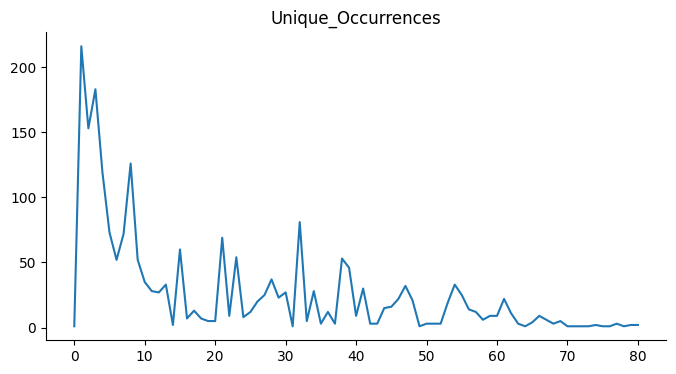

In [79]:
from matplotlib import pyplot as plt
allah_sura_distribution['Unique_Occurrences'].plot(kind='line', figsize=(8, 4), title='Unique_Occurrences')
plt.gca().spines[['top', 'right']].set_visible(False)

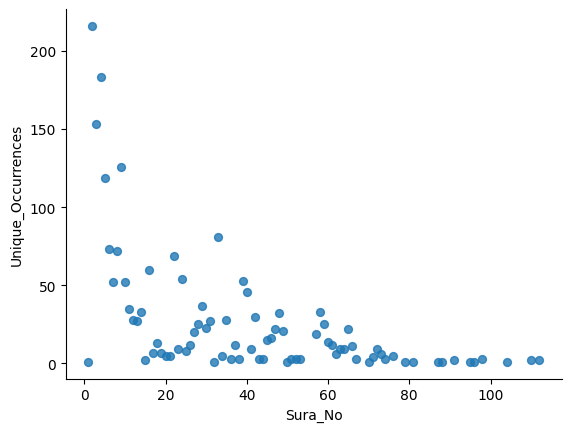

In [78]:
from matplotlib import pyplot as plt
allah_sura_distribution.plot(kind='scatter', x='Sura_No', y='Unique_Occurrences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [80]:
import pandas as pd

# Assuming allah_sura_distribution was created in a previous cell (like e9407c8d)

if 'allah_sura_distribution' in locals() and not allah_sura_distribution.empty:
    # Sort by 'Unique_Occurrences' in descending order to find the Surahs with the most occurrences
    surahs_most_allah = allah_sura_distribution.sort_values("Unique_Occurrences", ascending=False).reset_index(drop=True)

    print("Top 10 Surahs with the most unique 'الله' occurrences:")
    display(surahs_most_allah.head(10))

    # Optional: Export this sorted list
    output_file = "surahs_with_most_allah_occurrences.csv"
    surahs_most_allah.to_csv(output_file, index=False, encoding="utf-8")
    print(f"\n✅ List of Surahs with most 'الله' occurrences saved to {output_file}")

else:
    print("Error: 'allah_sura_distribution' DataFrame is not available or is empty. Please run the previous cell to generate it.")

Top 10 Surahs with the most unique 'الله' occurrences:


,Sura_No,Unique_Occurrences
0,2,216
1,4,183
2,3,153
3,9,126
4,5,119
5,33,81
6,6,73
7,8,72
8,22,69
9,16,60



✅ List of Surahs with most 'الله' occurrences saved to surahs_with_most_allah_occurrences.csv


from matplotlib import pyplot as plt
_df_38['Sura_No'].plot(kind='hist', bins=20, title='Sura_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Unique_Occurrences'].plot(kind='hist', bins=20, title='Unique_Occurrences')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='Sura_No', y='Unique_Occurrences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41['Sura_No'].plot(kind='line', figsize=(8, 4), title='Sura_No')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['Unique_Occurrences'].plot(kind='line', figsize=(8, 4), title='Unique_Occurrences')
plt.gca().spines[['top', 'right']].set_visible(False)

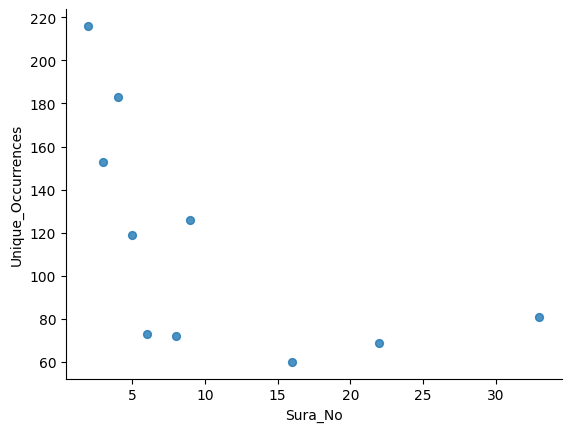

In [81]:
from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='Sura_No', y='Unique_Occurrences', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [68]:
import pandas as pd

# Assuming df_nouns was created in a previous cell (like ac65519b)

if df_nouns is not None and "Without_Diacritics" in df_nouns.columns:
    # 1️⃣ Count the occurrences of each unique word (without diacritics) in df_nouns
    noun_word_freq = (
        df_nouns["Without_Diacritics"]
        .value_counts()
        .reset_index()
        .rename(columns={"index": "Word", "count": "Occurrences"})
    )

    # 2️⃣ Sort by frequency in descending order
    noun_word_freq = noun_word_freq.sort_values("Occurrences", ascending=False).reset_index(drop=True)

    # 3️⃣ Display the top 20 most frequent noun words
    print("Top 20 most frequent noun words:")
    display(noun_word_freq.head(20))

    # 4️⃣ (Optional) Export the noun word frequencies
    noun_word_freq.to_csv("quran_noun_word_frequencies.csv", index=False, encoding="utf-8")
    print("\n✅ Fichier exporté : quran_noun_word_frequencies.csv")

else:
    print("Error: 'df_nouns' not available or 'Without_Diacritics' column not found.")

Top 20 most frequent noun words:


,Without_Diacritics,Occurrences
0,الله,2153
1,الأرض,287
2,كل,245
3,والله,240
4,ربك,220
5,شيء,190
6,السماوات,182
7,الناس,182
8,الكتاب,158
9,والأرض,157



✅ Fichier exporté : quran_noun_word_frequencies.csv


In [55]:
import pandas as pd

# Assuming df_raw was loaded in a previous cell (like crXu3Tnu3254)
# and noun_tags was obtained in cell 1YpqqajPy3za

if df_raw is not None and 'Morph_Tag' in df_raw.columns and noun_tags is not None:
    # Filter df_raw to include only rows where 'Morph_Tag' is in the noun_tags list
    df_nouns = df_raw[df_raw['Morph_Tag'].isin(noun_tags)].copy()

    print(f"Number of rows in the original dataset: {len(df_raw)}")
    print(f"Number of rows with noun tags: {len(df_nouns)}")

    # Display the first few rows of the filtered DataFrame
    print("\nFirst 5 rows of the filtered DataFrame (df_nouns):")
    display(df_nouns.head())
else:
    print("Error: 'df_raw' or 'noun_tags' not available. Please run the previous cells.")

Number of rows in the original dataset: 157676
Number of rows with noun tags: 23331

First 5 rows of the filtered DataFrame (df_nouns):


,Case_Mood,Case_Mood_Marker,Gloss,ID,Invariable_Declinable,Morph_Tag,Morph_Type,Phrasal_Function,Phrase,Possessive_Construct,Punctuation_Mark,Segment_No,Segmented_Word,Sura_No,Syntactic_Role,Verse_No,Without_Diacritics,Word,Word_No
1,GENITIVE,KASRA,in-(the)-name,1,DECLN,NOUN_ABSTRACT,Stem,None,None,CONSTRUCT,None,2,اسم,1,PREP_OBJ,1,بسم,بِسْمِ,1
3,GENITIVE,KASRA,(of)-allah,2,DECLN,NOUN_PROP,Stem,None,None,NOT_CONSTRUCT,None,2,له,1,GEN_CONS,1,الله,اللَّهِ,2
5,GENITIVE,KASRA,the-most-gracious,3,DECLN,NOUN_PROP,Stem,None,None,NOT_CONSTRUCT,None,2,رحمن,1,ADJ,1,الرحمن,الرَّحْمَنِ,3
7,GENITIVE,KASRA,the-most-merciful,4,DECLN,NOUN_PROP,Stem,None,None,NOT_CONSTRUCT,.,2,رحيم,1,ADJ,1,الرحيم,الرَّحِيمِ,4
11,GENITIVE,KASRA,(be)-to-allah,6,DECLN,NOUN_PROP,Stem,None,None,NOT_CONSTRUCT,None,2,له,1,PREP_OBJ,2,لله,لِلَّهِ,2


In [18]:
import json
import pandas as pd
from pathlib import Path

# ---- Paramètres ----
PATH_JSON = Path("MASAQ_dataset.json")  # adapte le chemin

# ---- Lecture JSON (liste de dicts ou NDJSON) ----
def load_masaq(path: Path) -> pd.DataFrame:
    try:
        obj = json.load(path.open("r", encoding="utf-8"))
        if isinstance(obj, list):
            return pd.DataFrame(obj)
        if isinstance(obj, dict):
            for v in obj.values():
                if isinstance(v, list) and v and isinstance(v[0], dict):
                    return pd.DataFrame(v)
            return pd.DataFrame([obj])
    except Exception:
        # NDJSON fallback
        rows = []
        with path.open("r", encoding="utf-8") as f:
            for line in f:
                line = line.strip()
                if line:
                    rows.append(json.loads(line))
        return pd.DataFrame(rows)

df_raw = load_masaq(PATH_JSON)
assert not df_raw.empty, "JSON vide / non lisible"

# ---- Colonnes utiles ----
needed = ["Sura_No","Verse_No","Word_No","ID","Without_Diacritics","Morph_Type"]
missing = [c for c in needed if c not in df_raw.columns]
assert not missing, f"Colonnes manquantes: {missing}"

df = df_raw[needed].copy()

# ---- Types et nettoyage ----
for c in ["Sura_No","Verse_No","Word_No","ID"]:
    df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64")
df["Without_Diacritics"] = df["Without_Diacritics"].fillna("").astype(str)
df["Morph_Type"] = df["Morph_Type"].fillna("")

# ---- Déduplication par mot logique (priorité Stem) ----
priority = pd.CategoricalDtype(categories=["Stem","Prefix","Suffix"], ordered=True)
df["morph_priority"] = df["Morph_Type"].astype(priority)

df = df.sort_values(
    ["Sura_No","Verse_No","Word_No","ID","morph_priority"],
    na_position="last"
)
df_unique = df.drop_duplicates(subset=["Sura_No","Verse_No","Word_No","ID"], keep="first")

# ---- Réorganisation des colonnes (ID en premier) ----
final_cols = ["ID","Sura_No","Verse_No","Word_No","Without_Diacritics"]
result = df_unique[final_cols].sort_values(["Sura_No","Verse_No","Word_No","ID"]).reset_index(drop=True)

# ---- Contrôles ----
print("Lignes totales (uniques):", len(result))
dups = result.duplicated(subset=["Sura_No","Verse_No","Word_No","ID"]).sum()
print("Doublons restants:", dups)
display(result.head(20))

Lignes totales (uniques): 77797
Doublons restants: 0


,ID,Sura_No,Verse_No,Word_No,Without_Diacritics
0,1,1,1,1,بسم
1,2,1,1,2,الله
2,3,1,1,3,الرحمن
3,4,1,1,4,الرحيم
4,5,1,2,1,الحمد
5,6,1,2,2,لله
6,7,1,2,3,رب
7,8,1,2,4,العالمين
8,9,1,3,1,الرحمن
9,10,1,3,2,الرحيم


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Verse_No'].plot(kind='hist', bins=20, title='Verse_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Word_No'].plot(kind='hist', bins=20, title='Word_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='ID', y='Verse_No', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Verse_No', y='Word_No', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Verse_No'].plot(kind='line', figsize=(8, 4), title='Verse_No')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Word_No'].plot(kind='line', figsize=(8, 4), title='Word_No')
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
import pandas as pd

# 🔹 On part du DataFrame 'result' obtenu précédemment
assert "Without_Diacritics" in result.columns, "Le DataFrame 'result' doit contenir la colonne 'Without_Diacritics'"

# 1️⃣ Compter les occurrences de chaque mot unique
word_freq = (
    result["Without_Diacritics"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Word", "Without_Diacritics": "Occurrences"})
)

# 2️⃣ Trier par fréquence décroissante
word_freq = word_freq.sort_values("Occurrences", ascending=False).reset_index(drop=True)

# 3️⃣ Ajouter des informations complémentaires (optionnelles)
# Nombre de mots uniques et total de tokens
n_unique = word_freq.shape[0]
n_total = result.shape[0]

print(f"🔢 Nombre total de mots (tokens) : {n_total:,}")
print(f"🧩 Nombre de mots différents : {n_unique:,}")
print(f"🧮 Ratio diversité lexicale : {n_unique/n_total:.3f}")

# 4️⃣ Aperçu du top 20
display(word_freq.head(20))

# 5️⃣ (Optionnel) Export
word_freq.to_csv("quran_word_frequencies.csv", index=False, encoding="utf-8")
print("✅ Fichier exporté : quran_word_frequencies.csv")


🔢 Nombre total de mots (tokens) : 77,797
🧩 Nombre de mots différents : 14,870
🧮 Ratio diversité lexicale : 0.191


,Occurrences,count
0,ييأس,2
1,يونس,2
2,يومين,3
3,يومهم,5
4,يومكم,5
5,يوما,16
6,يومئذ,65
7,يوم,217
8,يولون,1
9,يولوكم,1


✅ Fichier exporté : quran_word_frequencies.csv


from matplotlib import pyplot as plt
_df_8['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
pip install arabic-reshaper python-bidi wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 7.0 MB/s eta 0:00:00


In [33]:
# === Colab: dépendances RTL + wordcloud ===
!pip -q install arabic-reshaper python-bidi wordcloud

# === Installer une police arabe (Noto Naskh Arabic) ===
!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf -O /usr/local/share/fonts/NotoNaskhArabic-Regular.ttf
!fc-cache -fv > /dev/null

import matplotlib.pyplot as plt
from matplotlib import font_manager

ARABIC_FONT = "/usr/local/share/fonts/NotoNaskhArabic-Regular.ttf"

# Enregistrer la police et l'activer par défaut
font_manager.fontManager.addfont(ARABIC_FONT)
plt.rcParams["font.family"] = font_manager.FontProperties(fname=ARABIC_FONT).get_name()
plt.rcParams["axes.unicode_minus"] = False

print("✅ Police activée :", plt.rcParams["font.family"])

✅ Police(s) activée(s) : ['Noto Naskh Arabic', 'sans-serif']


In [34]:
import arabic_reshaper
from bidi.algorithm import get_display

def ar_display(text: str) -> str:
    """Prépare du texte arabe pour l'affichage (liaison + RTL)."""
    if not isinstance(text, str):
        text = str(text)
    return get_display(arabic_reshaper.reshape(text))

,Occurrences,count,Rank
0,من,2763,1
1,الله,2153,2
2,في,1185,3
3,ما,1010,4
4,إن,966,5
5,لا,812,6
6,الذين,810,7
7,على,670,8
8,إلا,664,9
9,ولا,658,10


/tmp/ipython-input-2358053214.py:74: UserWarning: Glyph 108 (l) missing from font(s) Noto Naskh Arabic.
  plt.tight_layout()
/tmp/ipython-input-2358053214.py:74: UserWarning: Glyph 112 (p) missing from font(s) Noto Naskh Arabic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Naskh Arabic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Naskh Arabic.
  fig.canvas.print_figure(bytes_io, **kw)


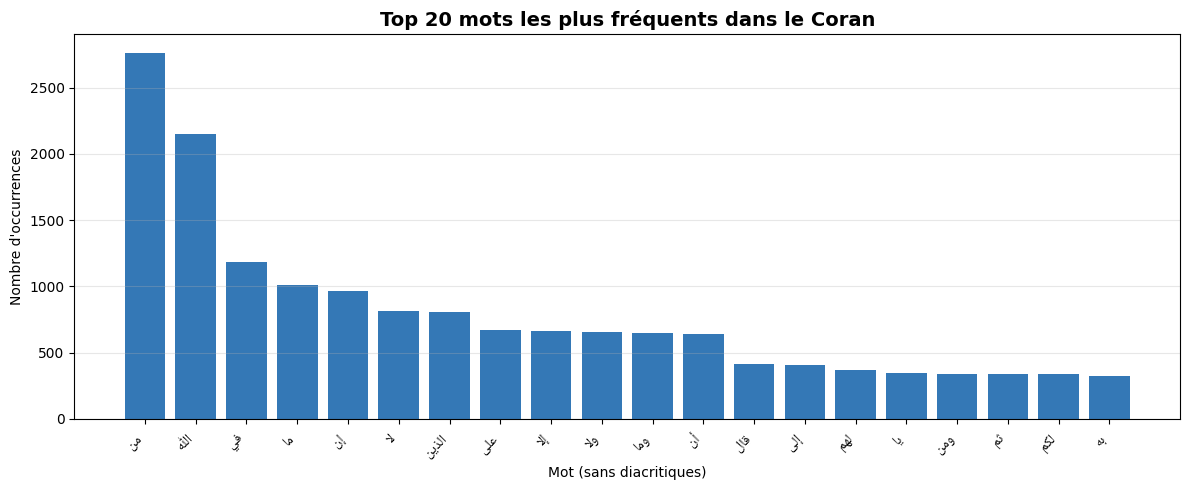

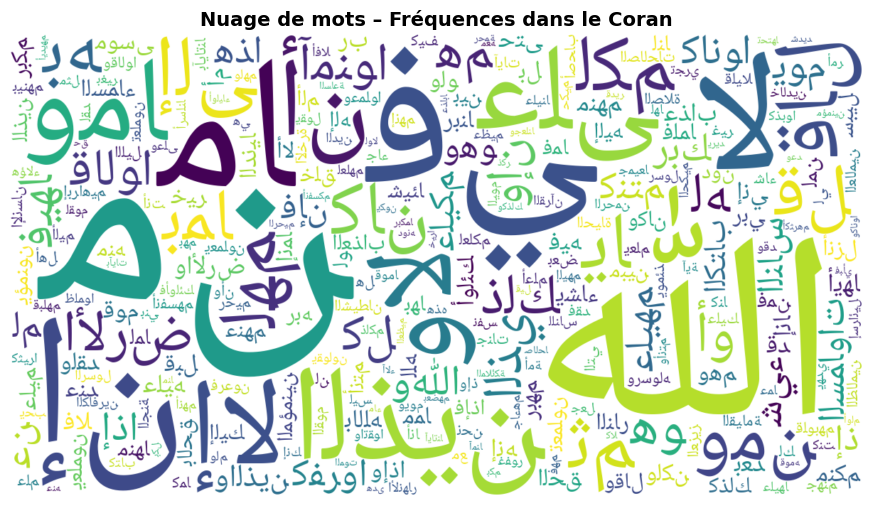

✅ Classement exporté → quran_word_ranked.csv


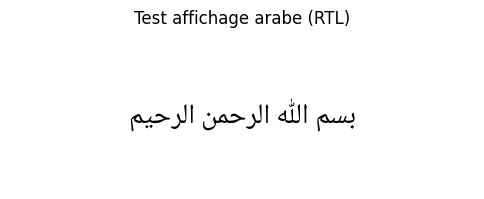

In [38]:
# ===============================
# Setup Colab : libs + police arabe
# ===============================
!pip -q install arabic-reshaper python-bidi wordcloud

# Police arabe (Noto Naskh Arabic)
!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf -O /usr/local/share/fonts/NotoNaskhArabic-Regular.ttf
!fc-cache -fv > /dev/null

# ===============================
# Imports & config affichage arabe
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

# --- Définition des polices ---
ARABIC_FONT = "/usr/local/share/fonts/NotoNaskhArabic-Regular.ttf"
LATIN_FONT = "DejaVu Sans"

# Charger la police arabe dans Matplotlib
font_manager.fontManager.addfont(ARABIC_FONT)
ARABIC_NAME = font_manager.FontProperties(fname=ARABIC_FONT).get_name()

plt.rcParams["axes.unicode_minus"] = False

def ar_display(text: str) -> str:
    """Prépare du texte arabe pour un rendu correct (liaison + RTL)."""
    if not isinstance(text, str):
        text = str(text)
    return get_display(arabic_reshaper.reshape(text))

# ===============================
# 0) Vérification du dataset
# ===============================
# Le DataFrame doit contenir : 'Occurrences' (mot) et 'count' (fréquence)
assert {"Occurrences","count"}.issubset(word_freq.columns), "Colonnes requises manquantes."
word_freq = word_freq.copy()
word_freq["Occurrences"] = word_freq["Occurrences"].astype(str)
word_freq["count"] = pd.to_numeric(word_freq["count"], errors="coerce").fillna(0).astype(int)

# ===============================
# 1) Classement des mots (rang)
# ===============================
word_freq["Rank"] = word_freq["count"].rank(method="dense", ascending=False).astype(int)
word_freq = word_freq.sort_values(["Rank","Occurrences"]).reset_index(drop=True)

from IPython.display import display
display(word_freq.head(20))

# ===============================
# 2) Histogramme Top-N (labels arabes + titre FR)
# ===============================
TOP_N = 20
top = word_freq.head(TOP_N).copy()
top["Occurrences_ar"] = top["Occurrences"].map(ar_display)  # reshape RTL pour affichage correct

plt.figure(figsize=(12, 5))
plt.bar(top["Occurrences_ar"], top["count"], color="#3478b6")

# ✅ Texte arabe sur l'axe X avec la police arabe
plt.xticks(rotation=45, ha="right", fontsize=11,
           fontproperties=font_manager.FontProperties(fname=ARABIC_FONT))

# ✅ Titres en français avec la police latine
plt.title(f"Top {TOP_N} mots les plus fréquents dans le Coran",
          fontsize=14, weight="bold", fontfamily=LATIN_FONT)
plt.xlabel("Mot (sans diacritiques)", fontfamily=LATIN_FONT)
plt.ylabel("Nombre d'occurrences", fontfamily=LATIN_FONT)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================
# 3) Wordcloud (texte arabe + titre FR)
# ===============================
# Dictionnaire {mot: fréquence} avec reshape+bidi
word_dict = {ar_display(k): int(v) for k, v in zip(word_freq["Occurrences"], word_freq["count"])}

wc = WordCloud(
    font_path=ARABIC_FONT,
    width=1200, height=650,
    background_color="white",
    colormap="viridis",
    max_words=300,
    prefer_horizontal=0.9,
).generate_from_frequencies(word_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots – Fréquences dans le Coran", fontsize=14, weight="bold", fontfamily=LATIN_FONT)
plt.show()

# ===============================
# 4) Export du classement complet
# ===============================
word_freq.to_csv("quran_word_ranked.csv", index=False, encoding="utf-8")
print("✅ Classement exporté → quran_word_ranked.csv")

# ===============================
# 5) Test RTL (facultatif)
# ===============================
plt.figure(figsize=(6,2))
plt.text(0.5, 0.5, ar_display("بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ"),
         fontsize=20, ha="center", va="center",
         fontproperties=font_manager.FontProperties(fname=ARABIC_FONT))
plt.axis("off")
plt.title("Test affichage arabe (RTL)", pad=8, fontfamily=LATIN_FONT)
plt.show()

In [39]:
import pandas as pd

# On part du DataFrame complet 'df_raw' (issu du JSON MASAQ)
# ou du DataFrame dédoublonné 'df_unique' si tu l’as déjà créé
# Si besoin : recharger ton fichier de base
# df_raw = pd.read_json("MASAQ_dataset.json", encoding="utf-8")

# Vérification que la colonne existe
assert "Morph_Tag" in df_raw.columns, "❌ Colonne 'Morph_Tag' manquante dans le dataset."

# 🔹 Filtrage sur les noms propres uniquement
df_nouns_prop = df_raw[df_raw["Morph_Tag"] == "NOUN_PROP"].copy()

# 🔹 Sélection des colonnes voulues
cols = ["ID", "Sura_No", "Verse_No", "Word_No", "Without_Diacritics"]
df_nouns_prop = df_nouns_prop[cols]

# 🔹 Normalisation et tri
for c in ["ID","Sura_No","Verse_No","Word_No"]:
    df_nouns_prop[c] = pd.to_numeric(df_nouns_prop[c], errors="coerce").astype("Int64")

df_nouns_prop = df_nouns_prop.dropna(subset=["Without_Diacritics"])
df_nouns_prop["Without_Diacritics"] = df_nouns_prop["Without_Diacritics"].astype(str)
df_nouns_prop = df_nouns_prop.sort_values(["Sura_No","Verse_No","Word_No"]).reset_index(drop=True)

# 🔹 Contrôle rapide
print("Nombre total de noms propres :", len(df_nouns_prop))
print("Nombre de sourates couvertes :", df_nouns_prop['Sura_No'].nunique())
display(df_nouns_prop.head(20))

# 🔹 Export (CSV + Parquet)
df_nouns_prop.to_csv("quran_nouns_prop.csv", index=False, encoding="utf-8")
try:
    df_nouns_prop.to_parquet("quran_nouns_prop.parquet", index=False)
except Exception as e:
    print("⚠️ Export parquet non effectué :", e)

print("✅ Dataset des noms propres sauvegardé → quran_nouns_prop.csv")


Nombre total de noms propres : 3491
Nombre de sourates couvertes : 99


,ID,Sura_No,Verse_No,Word_No,Without_Diacritics
0,2,1,1,2,الله
1,3,1,1,3,الرحمن
2,4,1,1,4,الرحيم
3,6,1,2,2,لله
4,9,1,3,1,الرحمن
5,10,1,3,2,الرحيم
6,78,2,7,2,الله
7,94,2,8,6,بالله
8,101,2,9,2,الله
9,114,2,10,5,الله


✅ Dataset des noms propres sauvegardé → quran_nouns_prop.csv


from matplotlib import pyplot as plt
_df_10['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Sura_No'].plot(kind='hist', bins=20, title='Sura_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Verse_No'].plot(kind='hist', bins=20, title='Verse_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Word_No'].plot(kind='hist', bins=20, title='Word_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('Without_Diacritics').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='ID', y='Sura_No', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Sura_No', y='Verse_No', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Verse_No', y='Word_No', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Sura_No'].plot(kind='line', figsize=(8, 4), title='Sura_No')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Verse_No'].plot(kind='line', figsize=(8, 4), title='Verse_No')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Word_No'].plot(kind='line', figsize=(8, 4), title='Word_No')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Without_Diacritics'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='ID', y='Without_Diacritics', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Without_Diacritics'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Sura_No', y='Without_Diacritics', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Without_Diacritics'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Verse_No', y='Without_Diacritics', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Without_Diacritics'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Word_No', y='Without_Diacritics', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
import pandas as pd

# Assure-toi que df_nouns_prop existe déjà
assert "Without_Diacritics" in df_nouns_prop.columns, "❌ Le DataFrame 'df_nouns_prop' est manquant."

# 🔹 Comptage des occurrences
nouns_prop_freq = (
    df_nouns_prop["Without_Diacritics"]
    .value_counts()
    .reset_index()
    # Correctly rename the columns after value_counts()
    .rename(columns={"index": "Word", "count": "Occurrences"})
)

# 🔹 Tri en ordre croissant
nouns_prop_freq = nouns_prop_freq.sort_values("Occurrences", ascending=False).reset_index(drop=True)

# 🔹 Aperçu
display(nouns_prop_freq.head(20))   # les plus fréquents
display(nouns_prop_freq.tail(20))   # les plus rares

# 🔹 Export CSV
nouns_prop_freq.to_csv("quran_nouns_prop_ranked_descending.csv", index=False, encoding="utf-8")
print("✅ Classement exporté → quran_nouns_prop_ranked_ascending.csv")

,Without_Diacritics,Occurrences
0,الله,2153
1,والله,240
2,بالله,139
3,لله,116
4,القيامة,70
5,العزيز,64
6,إبراهيم,62
7,الرحمن,45
8,الحكيم,40
9,الرحيم,34


,Without_Diacritics,Occurrences
142,وقرآنه,1
143,الخرطوم,1
144,ودا,1
145,أحمد,1
146,الصاخة,1
147,الطامة,1
148,قرآنه,1
149,عليون,1
150,والفجر,1
151,بعاد,1


✅ Classement exporté → quran_nouns_prop_ranked_ascending.csv


In [50]:
import pandas as pd

# Vérification que le dataset existe
assert "Without_Diacritics" in df_nouns_prop.columns, "❌ Le DataFrame 'df_nouns_prop' est manquant."

# ==============================================
# 1️⃣  Comptage des occurrences par nom propre
# ==============================================
nouns_prop_freq = (
    df_nouns_prop["Without_Diacritics"]
    .value_counts()
    .reset_index()
    # Correctly rename the columns after value_counts()
    .rename(columns={"index": "Word", "count": "Occurrences"})
)

# ==============================================
# 2️⃣  Calcul des deux classements
# ==============================================
# Use the 'Occurrences' column for ranking
nouns_prop_freq["RankAsc"]  = nouns_prop_freq["Occurrences"].rank(method="dense", ascending=True).astype(int)
nouns_prop_freq["RankDesc"] = nouns_prop_freq["Occurrences"].rank(method="dense", ascending=False).astype(int)


# ==============================================
# 3️⃣  Tri principal (ordre croissant)
# ==============================================
# Sort by 'Occurrences' instead of 'count'
nouns_prop_freq = nouns_prop_freq.sort_values("Occurrences", ascending=True).reset_index(drop=True)

# ==============================================
# 4️⃣  Aperçu des extrêmes
# ==============================================
print("🔹 20 noms propres les plus rares :")
display(nouns_prop_freq.head(20))

print("🔹 20 noms propres les plus fréquents :")
# Sort by 'Occurrences' instead of 'count' for displaying the most frequent
display(nouns_prop_freq.sort_values('Occurrences', ascending=False).head(20))

# ==============================================
# 5️⃣  Export final
# ==============================================
output_file = "quran_nouns_prop_ranked_dual.csv"
nouns_prop_freq.to_csv(output_file, index=False, encoding="utf-8")
print(f"✅ Fichier exporté → {output_file}")

🔹 20 noms propres les plus rares :


,Without_Diacritics,Occurrences,RankAsc,RankDesc
0,ببدر,1,1,29
1,بيحيى,1,1,29
2,السوأى,1,1,29
3,سبإ,1,1,29
4,العشاء,1,1,29
5,طور,1,1,29
6,الحسرة,1,1,29
7,وتالله,1,1,29
8,النون,1,1,29
9,الزبور,1,1,29


🔹 20 noms propres les plus fréquents :


,Without_Diacritics,Occurrences,RankAsc,RankDesc
161,الله,2153,29,1
160,والله,240,28,2
159,بالله,139,27,3
158,لله,116,26,4
157,القيامة,70,25,5
156,العزيز,64,24,6
155,إبراهيم,62,23,7
154,الرحمن,45,22,8
153,الحكيم,40,21,9
152,الرحيم,34,20,10


✅ Fichier exporté → quran_nouns_prop_ranked_dual.csv
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_27['Occurrences'].plot(kind='hist', bins=20, title='Occurrences')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['RankAsc'].plot(kind='hist', bins=20, title='RankAsc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['RankDesc'].plot(kind='hist', bins=20, title='RankDesc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Occurrences', y='RankAsc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='RankAsc', y='RankDesc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RankDesc']
  ys = series['Occurrences']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('RankDesc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RankDesc')
_ = plt.ylabel('Occurrences')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RankDesc']
  ys = series['RankAsc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('RankDesc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RankDesc')
_ = plt.ylabel('RankAsc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RankDesc']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RankDesc'}, axis=1)
              .sort_values('RankDesc', ascending=True))
  xs = counted['RankDesc']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('RankDesc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RankDesc')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_35['Occurrences'].plot(kind='line', figsize=(8, 4), title='Occurrences')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['RankAsc'].plot(kind='line', figsize=(8, 4), title='RankAsc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['RankDesc'].plot(kind='line', figsize=(8, 4), title='RankDesc')
plt.gca().spines[['top', 'right']].set_visible(False)